<a href="https://colab.research.google.com/github/hirokimituya/book_create-profitable-AI-with-Python/blob/main/technical_analysis/book/%E7%AC%AC1%E5%9B%9E_%E6%A0%AA%E4%BE%A1%E4%BA%88%E6%B8%AC_%E5%8F%AF%E8%A6%96%E5%8C%96%E7%B7%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ライブラリのダウンロード

In [ ]:
!pip install mplfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 2.9 MB/s eta 0:00:00


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib


--2023-03-29 20:54:40--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-03-29 20:54:40--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-03-29 20:54:40--  http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving nchc.dl.sourceforge.n

## ライブラリのインポート

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

# テクニカル分析のためのライブラリ
import talib as ta

# ローソク足、出来高、移動平均線、ボリンジャーバンドなどを表示できる便利なライブラリ
import mplfinance as mpf

# warningを消す
import warnings
warnings.simplefilter('ignore')

## 株価のデータをダウンロード


`df = data.DataReader('指定①', '指定②', start, end)` で取得したいデータを指定します。

*   指定①：AAPL, ^DJI, ^NKX, 4689.JP, 1358.JP（企業コードは検索すれば出てきます！）
*   指定②： 図１, from pandas-datareader -> Contents -> Remote Data Accessから選択



In [ ]:
start = '2005-01-01'
end = '2022-01-01'

df = data.DataReader('4689.JP', 'stooq', start, end)

In [ ]:
# データを確認していく
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4108 entries, 2021-12-30 to 2005-03-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4108 non-null   float64
 1   High    4108 non-null   float64
 2   Low     4108 non-null   float64
 3   Close   4108 non-null   float64
 4   Volume  4108 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 192.6 KB


In [ ]:
df.head()
# df.tail()     # 最後までデータたっぷりを確認

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-30,640.24,670.03,639.05,660.53,21456564
2021-12-29,637.37,642.91,635.29,639.25,7332714
2021-12-28,642.51,647.86,636.97,637.37,12983002
2021-12-27,649.24,652.71,631.73,633.61,16657947
2021-12-24,656.27,682.99,654.89,656.57,18243374


In [ ]:
date = df.index
close = df['Close']

# 移動平均を作成
span5 = 5   # 5日移動平均
span25 = 25 # 25日移動平均
span50 = 50 # 50日移動平均

df['sma5'] = close.rolling(window=span5).mean() # min or max or mean
df['sma25'] = close.rolling(window=span25).mean()
df['sma50'] = close.rolling(window=span50).mean()

# MACD(トレンドの指標を見る)
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26,
                                                       signalperiod=9)

# RSI(売られすぎ・買われ過ぎの判断材料)
df['RSI'] = ta.RSI(close, timeperiod=span25)

# ボリンジャーバンド（プラスマイナスの標準偏差の2倍を使用: 基本的にはボリンジャーバンドに収まるが、
# 収まらない場合はRSI）
df['upper'], df['middle'], df['lower'] = ta.BBANDS(close, timeperiod=span25, nbdevdn=2,
                                                   matype=0)

# candle（ローソク足で分析するために追記）
df_candle = df[['High', 'Low', 'Open', 'Close', 'Volume']]

ConversionError: ignored

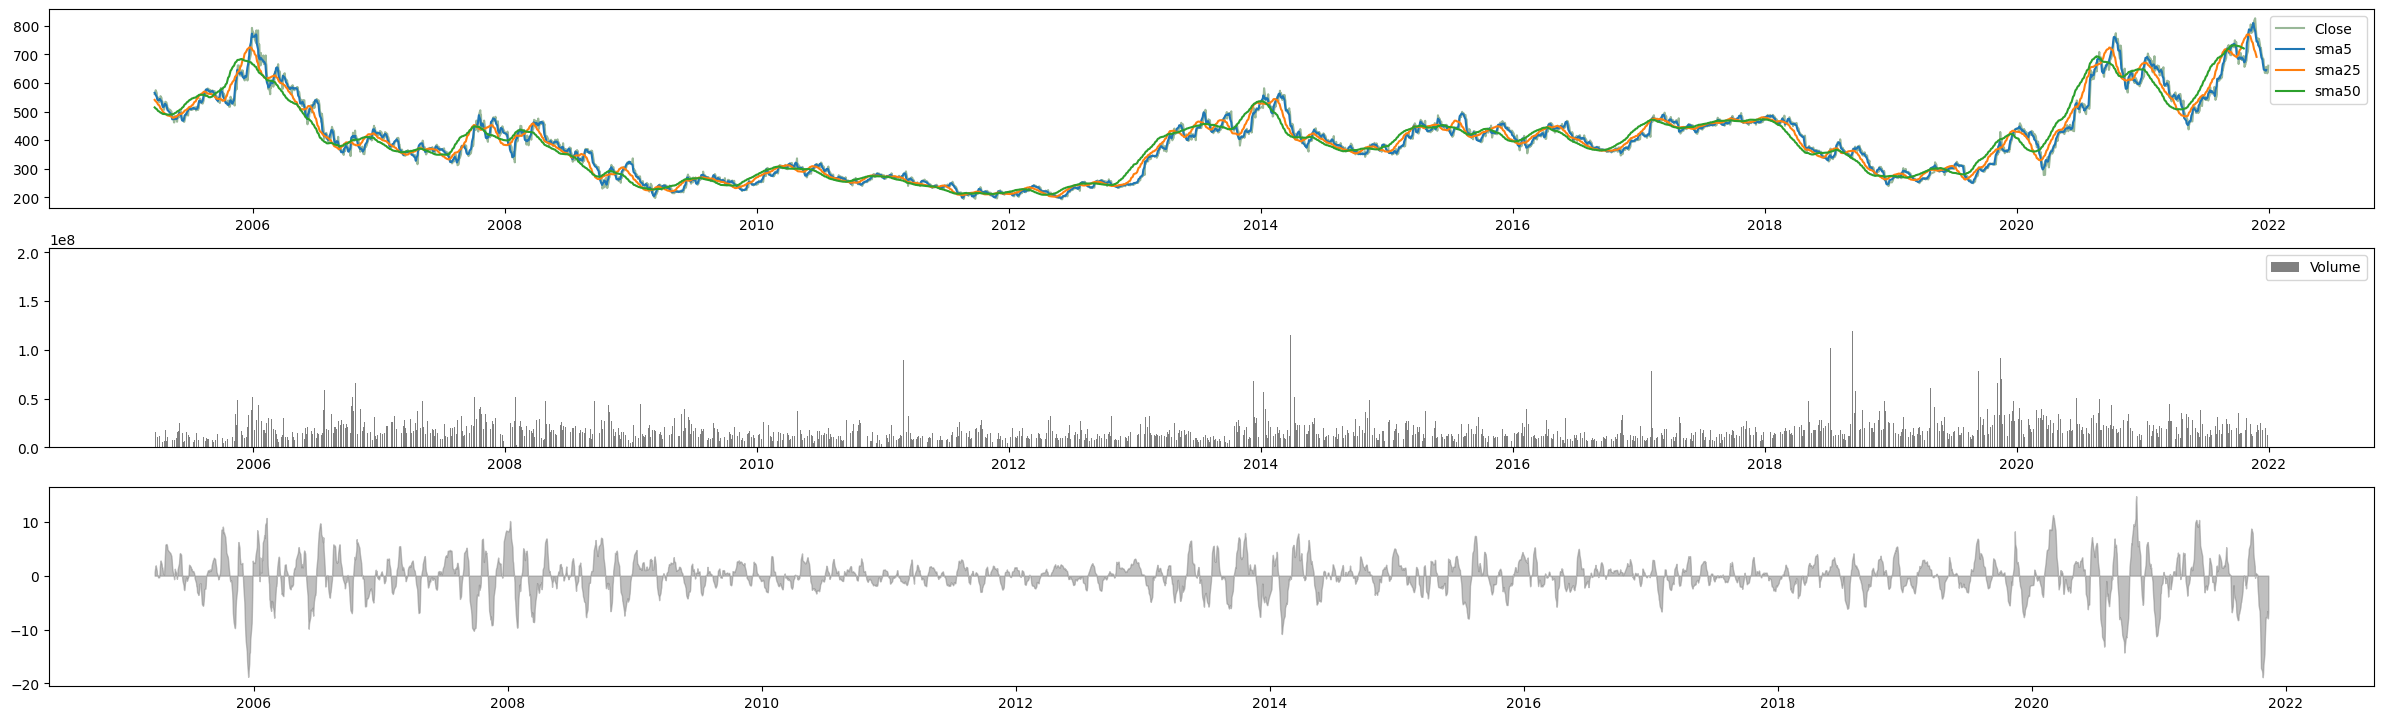

In [ ]:
plt.figure(figsize=(30, 15))

# 移動平均
plt.subplot(5, 1, 1)
plt.plot(date, close, label='Close', color='#99b898')
plt.plot(date, df['sma5'], label='sma5')
plt.plot(date, df['sma25'], label='sma25')
plt.plot(date, df['sma50'], label='sma50')
plt.legend()

# 出来高
plt.subplot(5, 1, 2)
plt.bar(date, df['Volume'], label='Volume', color='grey')
plt.legend()

# MACD
plt.subplot(5, 1, 3)
plt.fill_between(date, df['macdhist'], color='grey', alpha=0.5, label='MACD_hist')
plt.hlines(0, start, end, 'grey', linestytyles='dashed')
plt.legend()

# RSI
plt.subplot(5, 1, 4)
plt.plot(date, df['RSI'], label='RSI', color='grey')
plt.ylim(0, 100)
plt.hlines([30, 50, 70], start, end, 'grey', linestyles='dashed')
plt.legend()

# ボリンジャーバンド
plt.subplot(5, 1, 5)
plt.plot(date, close, label='Close', color='#99b898')
plt.fill_between(date, df['upper'], df['lower'], color='grey', alpha=0.3)
plt.legend()

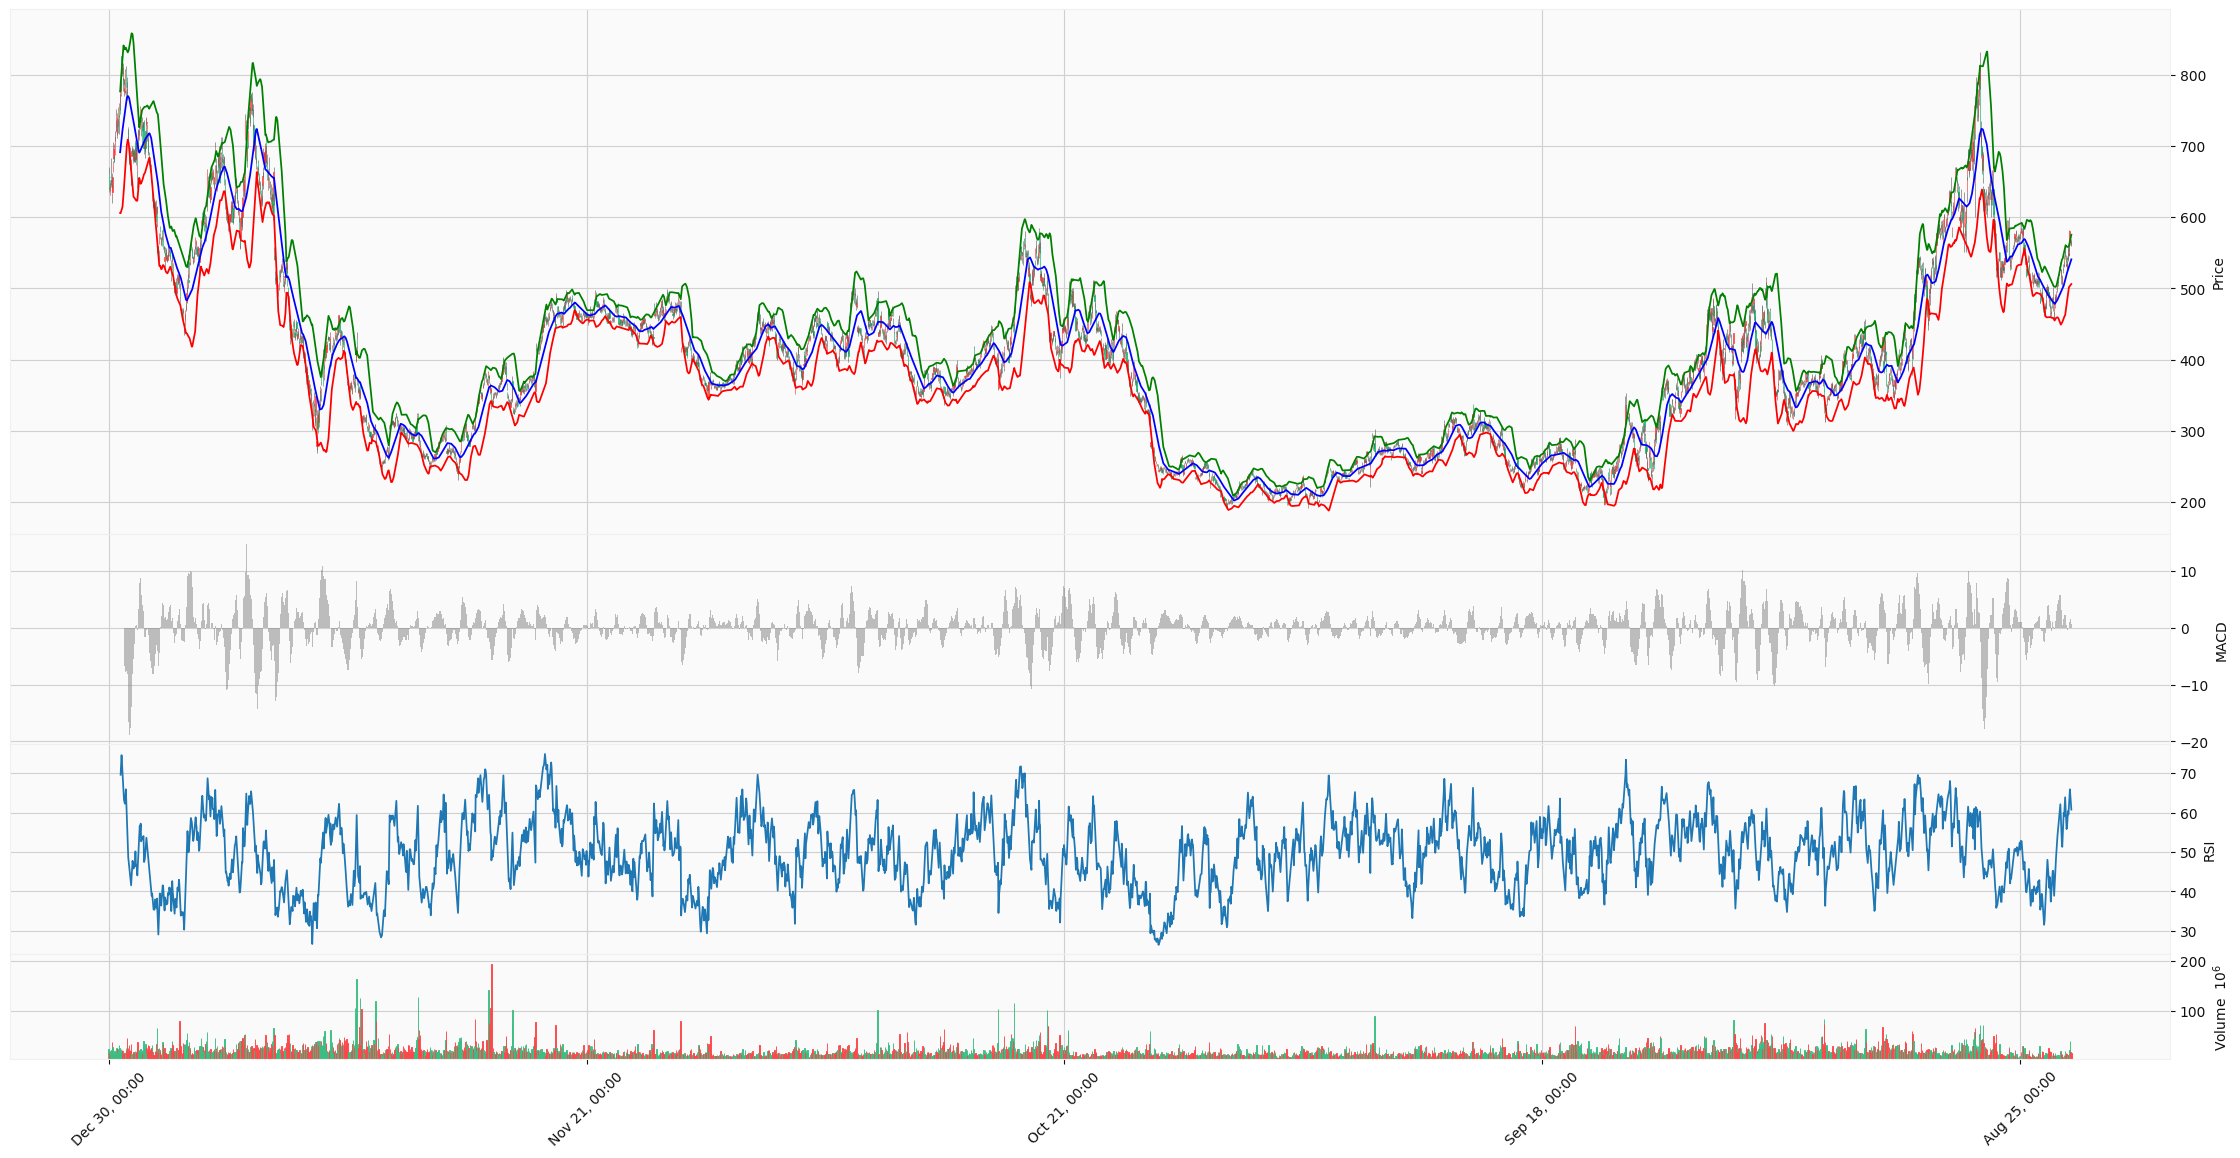

In [ ]:
apds = [
    mpf.make_addplot(df['upper'], color='g'),
    mpf.make_addplot(df['middle'], color='b'),
    mpf.make_addplot(df['lower'], color='r'),
    mpf.make_addplot(df['macdhist'], type='bar', color='gray', width=1.0, panel=1,
                     alpha=0.5, ylabel='MACD'),
    mpf.make_addplot(df['RSI'], panel=2, type='line', ylabel='RSI')
]

mpf.plot(df, type='candle', figsize=(30, 15), style='yahoo', volume=True,
         addplot=apds, volume_panel=3, panel_ratios=(5, 2, 2, 1))

In [ ]:
df.tail()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,
2005-03-28,580.34,582.52,551.87,565.00,19160290,551.428,533.2952,508.7662,12.702128,11.774199,0.927929,63.824632,563.467374,533.2952,503.123026
2005-03-25,571.59,577.05,567.19,574.87,38070346,557.780,535.9676,510.7592,14.169759,12.253311,1.916448,65.946362,568.470784,535.9676,503.464416
2005-03-24,565.00,566.09,560.64,562.82,15234167,560.408,537.8948,512.2046,14.196880,12.642025,1.554855,61.368905,570.821843,537.8948,504.967757
2005-03-23,562.82,567.19,559.54,563.90,15320012,563.692,539.5152,513.4966,14.142494,12.942119,1.200376,61.617637,573.400718,539.5152,505.629682
2005-03-22,561.73,569.39,560.64,561.73,14452412,565.664,540.8736,514.7014,13.765611,13.106817,0.658794,60.798324,575.481908,540.8736,506.265292


In [ ]:
df = df.sort_index()

In [ ]:
df.head()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,
2005-03-22,561.73,569.39,560.64,561.73,14452412,565.664,540.8736,514.7014,13.765611,13.106817,0.658794,60.798324,575.481908,540.8736,506.265292
2005-03-23,562.82,567.19,559.54,563.90,15320012,563.692,539.5152,513.4966,14.142494,12.942119,1.200376,61.617637,573.400718,539.5152,505.629682
2005-03-24,565.00,566.09,560.64,562.82,15234167,560.408,537.8948,512.2046,14.196880,12.642025,1.554855,61.368905,570.821843,537.8948,504.967757
2005-03-25,571.59,577.05,567.19,574.87,38070346,557.780,535.9676,510.7592,14.169759,12.253311,1.916448,65.946362,568.470784,535.9676,503.464416
2005-03-28,580.34,582.52,551.87,565.00,19160290,551.428,533.2952,508.7662,12.702128,11.774199,0.927929,63.824632,563.467374,533.2952,503.123026


In [ ]:
df2 = df[(df.index>='2021-01-01 00:00:00') & (df.index<='2022-01-01 00:00:00')]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2021-01-04 to 2021-12-30
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        245 non-null    float64
 1   High        245 non-null    float64
 2   Low         245 non-null    float64
 3   Close       245 non-null    float64
 4   Volume      245 non-null    int64  
 5   sma5        241 non-null    float64
 6   sma25       221 non-null    float64
 7   sma50       196 non-null    float64
 8   macd        212 non-null    float64
 9   macdsignal  212 non-null    float64
 10  macdhist    212 non-null    float64
 11  RSI         220 non-null    float64
 12  upper       221 non-null    float64
 13  middle      221 non-null    float64
 14  lower       221 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 30.6 KB


In [ ]:
date2=df2.index
close = df2['Close']

# 移動平均を作成(加重移動平均と指数平滑移動平均は今回は作成しない)
span5 = 5 # 5日移動平均
span25 = 25 # 25日移動平均
span50 = 50 # 50日移動平均

df2['sma5'] = close.rolling(window=span5).mean() # min or max or mean
df2['sma25'] = close.rolling(window=span25).mean()
df2['sma50'] = close.rolling(window=span50).mean()

# MACD（トレンドの指標を見る）
df2['macd'], df2['macdsignal'], df2['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

# RSI（売られすぎ・買われすぎの判断材料）
df2['RSI'] = ta.RSI(close, timeperiod=span25)

# ボリンジャーバンド（プラスナイナスの標準偏差の2倍を使用:基本的にはボリンジャーバンドに収まるが、治らない場合はRSI）
df2['upper'], df2['middle'], df2['lower'] = ta.BBANDS(close, timeperiod=span25, nbdevdn=2, matype=0)

# candle
df2_candle = df2[['High', 'Low', 'Open', 'Close', 'Volume']]

ConversionError: ignored

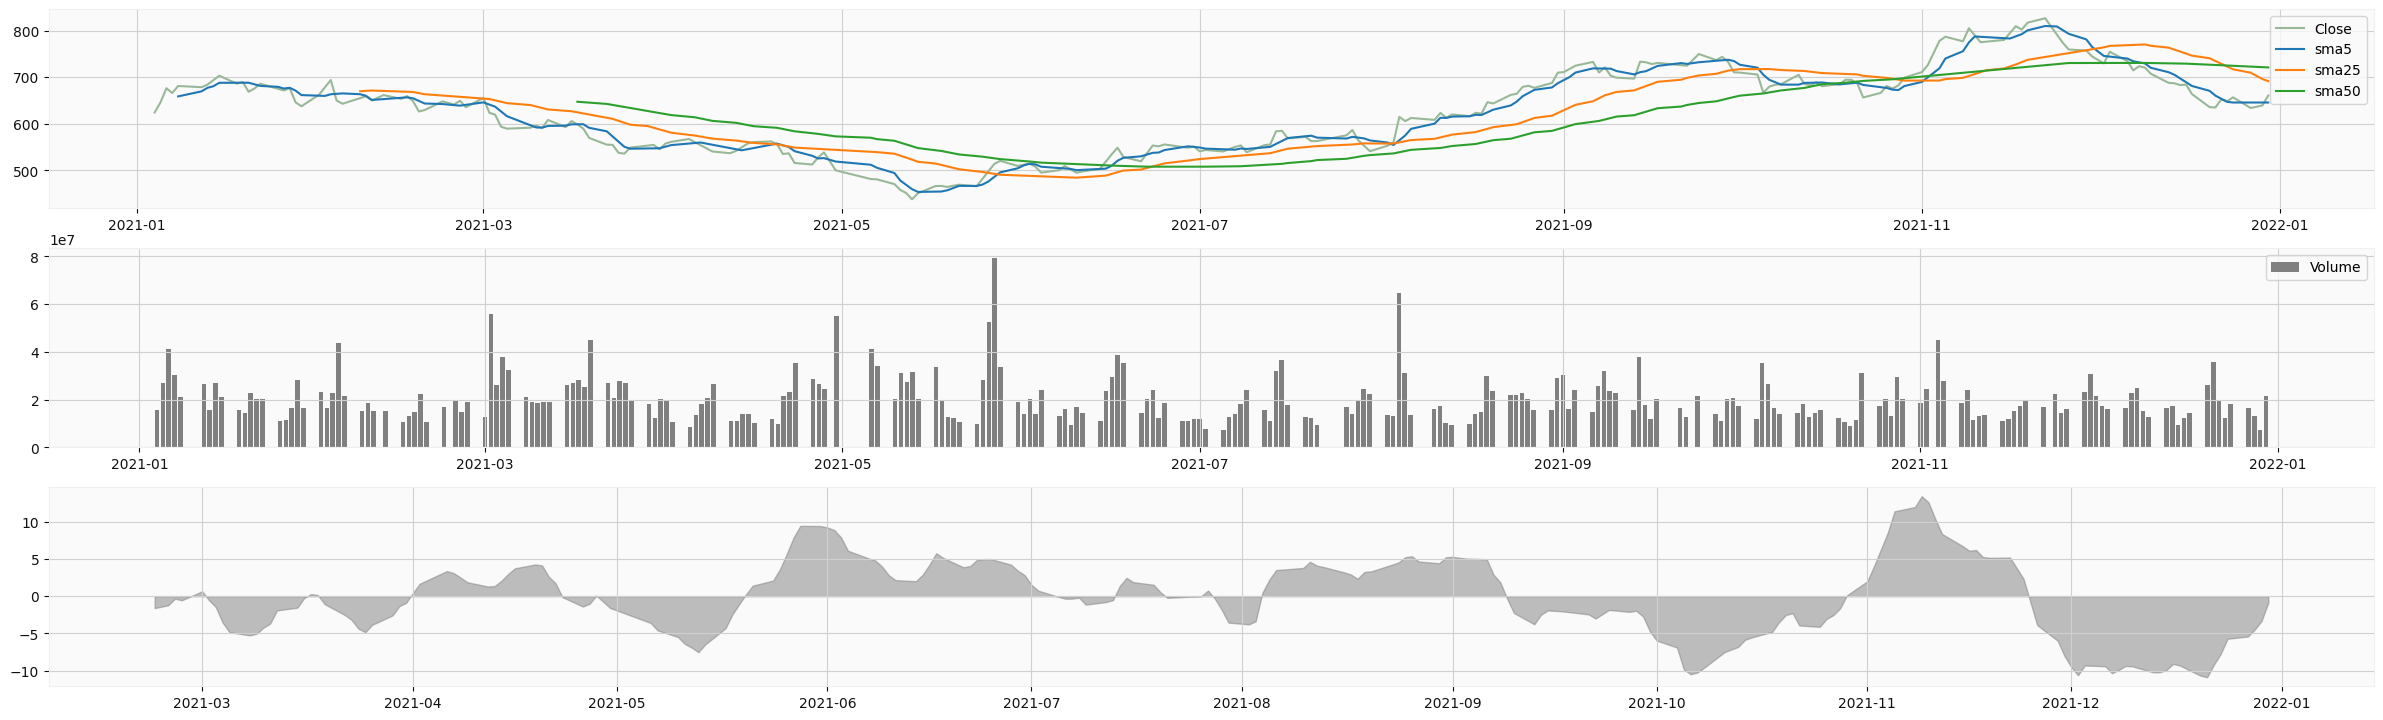

In [ ]:
plt.figure(figsize=(30, 15))
plt.subplot(5,1,1)

# 移動平均
plt.plot(date2,close,label='Close',color='#99b898')
plt.plot(date2,df2['sma5'],label='sma5')
plt.plot(date2,df2['sma25'],label='sma25')
plt.plot(date2,df2['sma50'],label='sma50')
plt.legend()

# 出来高
plt.subplot(5,1,2)
plt.bar(date2,df2['Volume'],label='Volume',color='grey')
plt.legend()

# MACD
plt.subplot(5,1,3)
plt.fill_between(date2, df2['macdhist'], color = 'grey', alpha = 0.5, label='MACD_hist')
plt.hlines(0, '2021-01-01', '2022-01-01', "grey", linestyles="dashed")
plt.legend()

# RSI
plt.subplot(5,1,4)
plt.plot(date2,df2['RSI'],label='RSI',color='grey')
plt.ylim(0, 100)
plt.hlines([30, 50, 70], '2021-01-01', '2022-01-01', 'grey', linestyles='dashed')
plt.legend()

# ボリンジャーバンド
plt.subplot(5,1,5)
plt.plot(date2, close, label = 'Close', color='#99b898')
plt.fill_between(date2, df2['upper'], df2['lower'], color='grey', alpha=0.3)
plt.legend()

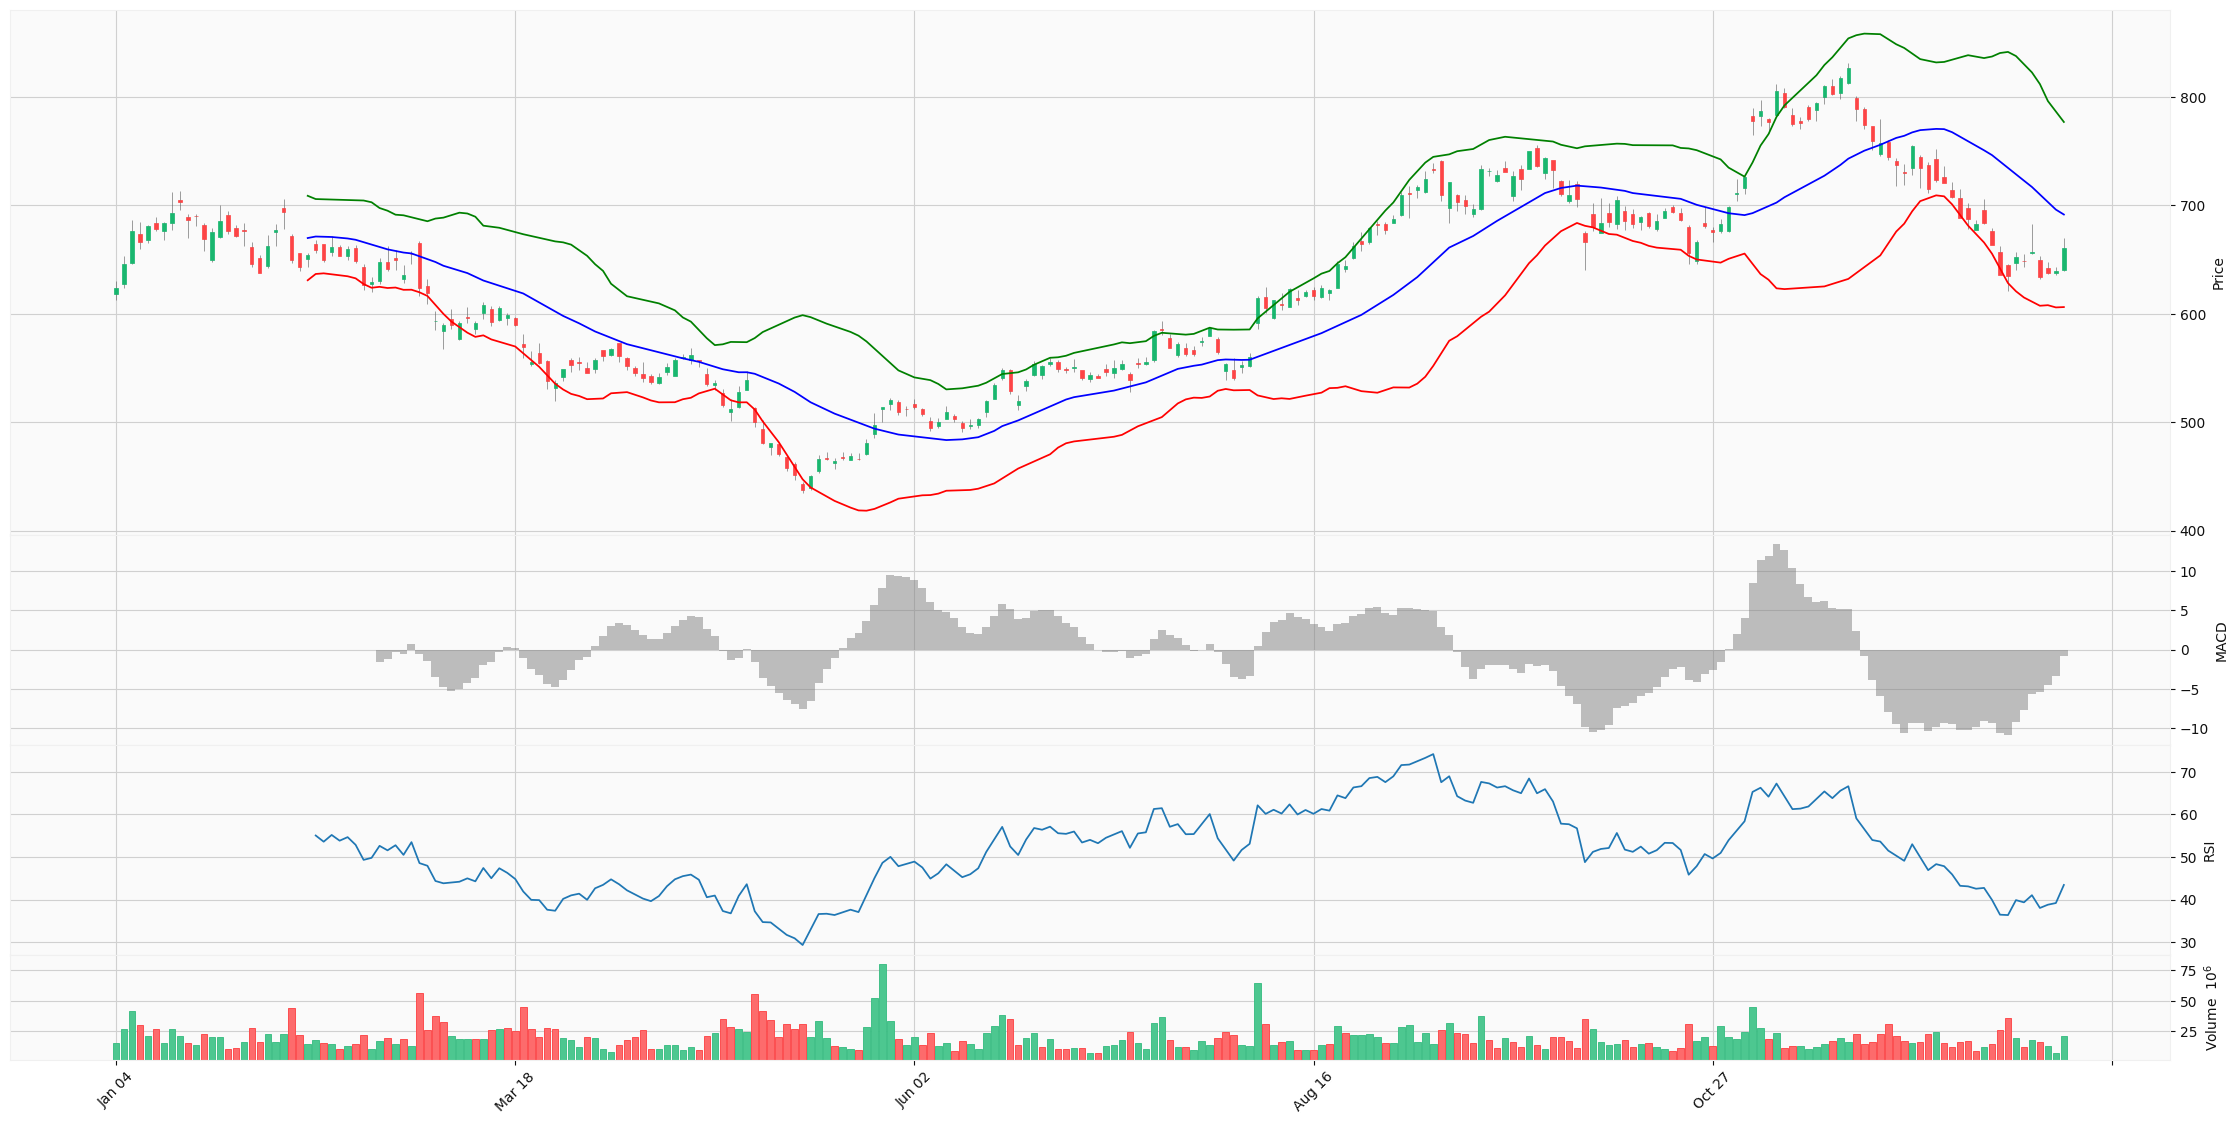

In [ ]:
apds = [mpf.make_addplot(df2['upper'], color='g'),
        mpf.make_addplot(df2['middle'], color='b'),
        mpf.make_addplot(df2['lower'], color='r'),
        mpf.make_addplot(df2['macdhist'], type='bar', color='gray',
                         width=1.0, panel=1, alpha=0.5, ylabel='MACD'),
        mpf.make_addplot(df2['RSI'], panel=2, type='line', ylabel='RSI'),
       ]

mpf.plot(df2, type='candle', figsize=(30, 15), style='yahoo', volume=True,
         addplot = apds, volume_panel=3, panel_ratios=(5,2,2,1))